In [13]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
from __future__ import division

In [14]:
resultsNOBG = pd.read_csv('../Mahalonobis/All-NoBG-All.csv', sep=',')
#resultsSolar= pd.read_csv('../Classification/All-Solar Data-All.csv', sep=',')
#resultsCropped= pd.read_csv('../Classification/All-Cropped-All.csv', sep=',')

#type(results)

In [15]:
from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

from matplotlib import rcParams
rcParams['axes.titlepad'] = 14 
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
#rcParams.keys()


In [16]:
%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
def getrow(data, n):
    row = data[1:-1].split("\n")[n].split("[")[1].split("]")[0]
    cols = re.sub(' +',' ',row)
    cols = cols.lstrip().split(" ")
    x = [int(cols[0]),int(cols[1]),int(cols[2]),int(cols[3]),int(cols[4]),int(cols[5])]
    return x

In [19]:
def genMatrix(matrix):
    x0 = getrow(matrix, 0)
    x1 = getrow(matrix, 1)
    x2 = getrow(matrix, 2)
    x3 = getrow(matrix, 3)
    x4 = getrow(matrix, 4)
    x5 = getrow(matrix, 5)
    cnf_matrix = np.array([x0,x1,x2,x3,x4,x5])
    return cnf_matrix

In [20]:
def GetAverageMatrix(data,algorithm,dataSize):
    s1 = data["Classifier"]==algorithm
    s2 = data["Count"]==dataSize
    data = data[ s1 & s2]
    matrices =  data["Confusion Matrix"].as_matrix()
    sum = genMatrix(matrices[0])
    for m in matrices[1:]:
        sum = sum + genMatrix(m)
    sum = sum//len(matrices)
    return sum

Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.91 0.09 0.   0.   0.  ]
 [0.   0.06 0.9  0.03 0.01 0.  ]
 [0.   0.   0.08 0.79 0.12 0.01]
 [0.   0.   0.01 0.15 0.74 0.1 ]
 [0.   0.   0.   0.02 0.08 0.9 ]]


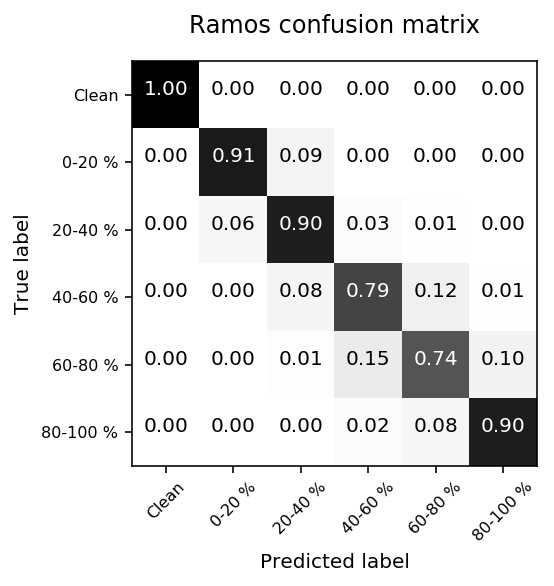

In [21]:
#cnf_matrix = confusion_matrix(y_test, y_pred)
alg = "Ramos"
size = 'Full'
cnf_matrix = GetAverageMatrix(resultsNOBG,alg,size)
np.set_printoptions(precision=2)
class_names = ["Clean","0-20 %","20-40 %","40-60 %","60-80 %","80-100 %"]

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title=alg+' confusion matrix',cmap = plt.cm.Greys)

plt.show()
fig.savefig('Matrix-'+alg+'-'+size+'.png', dpi=300, bbox_inches='tight', transparent=True)